# Creating word vectors

We're creating word vectors

#### dependencies

In [1]:
import nltk
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show, figure
import pandas as pd
%matplotlib inline

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/rahul/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Load data

In [3]:
from nltk.corpus import gutenberg

In [4]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [5]:
len(gutenberg.fileids())

18

#### Tokenize text

In [6]:
gberg_sent_tokens =sent_tokenize(gutenberg.raw())

In [7]:
gberg_sent_tokens[1]

"She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period."

In [8]:
word_tokenize(gberg_sent_tokens[1])

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [9]:
gberg_sents = gutenberg.sents()

In [10]:
len(gutenberg.words())

2621613

In [11]:
model = Word2Vec(sentences=gberg_sents, size=64, sg=1, window=10, min_count=5, seed=42, workers=6)

In [12]:
model.save('raw_gutenberg_model.w2v')

####  Explore model

In [13]:
model = gensim.models.Word2Vec.load('raw_gutenberg_model.w2v')

In [14]:
model['dog']

/home/rahul/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.17129108,  0.22954312, -0.03283656, -0.3135764 , -0.24069837,
       -0.19774781,  0.00555072,  0.19273382,  0.3239716 , -0.1327289 ,
       -0.54979634,  0.33409983, -0.4021617 ,  0.18257916, -0.63750434,
        0.23852876,  0.04187164,  0.47129357, -0.03111959, -0.07633465,
        0.10170946,  0.33302468,  0.21178432,  0.09257714, -0.05099655,
       -0.2184153 , -0.04665937,  0.21958241,  0.25539905,  0.14943056,
        0.11637834, -0.43185756, -0.00140251, -0.11079399, -0.1175653 ,
        0.6670449 , -0.2964658 , -0.38713583,  0.07454366, -0.13695766,
       -0.3358737 ,  0.09648225, -0.27213687,  0.32861814, -0.09093489,
       -0.05842358,  0.23272   , -0.5966228 , -0.4621933 ,  0.15972161,
        0.05736185, -0.47921142, -0.58889973, -0.46154118,  0.24649952,
        0.2088614 ,  0.03516366, -0.5256219 , -0.10107306,  0.00543791,
        0.2704015 , -0.3794247 ,  0.0510832 , -0.4710588 ], dtype=float32)

In [15]:
model.most_similar('dog')

/home/rahul/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('puppy', 0.8105628490447998),
 ('cage', 0.7688406705856323),
 ('sweeper', 0.7522279024124146),
 ('pet', 0.7416445016860962),
 ('kettle', 0.7311646342277527),
 ('broth', 0.729839563369751),
 ('pig', 0.7258090972900391),
 ('shell', 0.7239627838134766),
 ('bridle', 0.7220308780670166),
 ('fox', 0.721535325050354)]

In [16]:
model.most_similar('think')

/home/rahul/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('suppose', 0.8670011162757874),
 ('contradict', 0.845585823059082),
 ('manage', 0.8385958075523376),
 ('know', 0.8341801166534424),
 ('believe', 0.8177918195724487),
 ('NOW', 0.8146783113479614),
 ('pretend', 0.814137876033783),
 ('downright', 0.8118048906326294),
 ('anyhow', 0.8088726997375488),
 ('imagine', 0.8085711002349854)]

In [17]:
model.most_similar('day')

/home/rahul/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('morning', 0.7788848876953125),
 ('night', 0.754286527633667),
 ('time', 0.7251174449920654),
 ('evening', 0.7206752300262451),
 ('month', 0.6986420154571533),
 ('week', 0.6828016638755798),
 ('sabbath', 0.6712359189987183),
 ('morrow', 0.6648827791213989),
 ('feasting', 0.657943606376648),
 ('fortnight', 0.6541347503662109)]

In [18]:
model.most_similar('father')

/home/rahul/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('mother', 0.8664522171020508),
 ('brother', 0.8435885906219482),
 ('sister', 0.8094151616096497),
 ('Amnon', 0.778136134147644),
 ('wife', 0.7735315561294556),
 ('daughter', 0.7702721357345581),
 ('bondwoman', 0.7317984104156494),
 ('servant', 0.7261239886283875),
 ('uncle', 0.7259933352470398),
 ('Tamar', 0.7211692929267883)]

In [19]:
model.doesnt_match("mother father daughter dog".split())

/home/rahul/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.


'dog'

In [20]:
model.most_similar(positive=['father', 'woman'], negative=['man'])

/home/rahul/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('mother', 0.7949538826942444),
 ('sister', 0.7857887148857117),
 ('daughter', 0.761673092842102),
 ('wife', 0.7612605094909668),
 ('husband', 0.7512316107749939),
 ('brother', 0.7090225219726562),
 ('Sarah', 0.7081153988838196),
 ('Sarai', 0.7055912017822266),
 ('child', 0.6997240781784058),
 ('conceived', 0.673878014087677)]

In [21]:
model.most_similar(positive=['king', 'woman'], negative=['man']) 

/home/rahul/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('Sarah', 0.7472368478775024),
 ('Solomon', 0.7166213989257812),
 ('Rachel', 0.7017801403999329),
 ('Hagar', 0.6969853639602661),
 ('Sarai', 0.6940860748291016),
 ('Leah', 0.6932142972946167),
 ('Laban', 0.6888851523399353),
 ('Abram', 0.6868556141853333),
 ('Pharaoh', 0.6697289943695068),
 ('Bethuel', 0.6650490760803223)]

#### Reduce word vectore dimensionality with t-SNE

In [22]:
len(model.wv.vocab)

17011

In [23]:
X = model[model.wv.vocab]

/home/rahul/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [24]:
type(X)

numpy.ndarray

In [25]:
tsne = TSNE(n_components=2, n_iter=1000)

In [26]:
X_2d = tsne.fit_transform(X)

In [27]:
coords_df = pd.DataFrame(X_2d, columns=['x', 'y'])
coords_df['tokens'] = model.wv.vocab.keys()

In [28]:
coords_df.head()

,x,y,tokens
0,-35.077866,36.465328,cow
1,-21.425018,21.338934,_his_
2,-10.355288,57.107021,head
3,-21.600832,19.685024,thundered
4,-21.349712,-34.907928,joke


In [29]:
coords_df.to_csv('raw_gutenberg_tsne.csv', index=False)

#### Visualize 2D representation of word vectors

In [30]:
coords_df = pd.read_csv('raw_gutenberg_tsne.csv')

In [31]:
coords_df.head(20)

,x,y,tokens
0,-35.077866,36.465330,cow
1,-21.425018,21.338934,_his_
2,-10.355288,57.107020,head
3,-21.600832,19.685024,thundered
4,-21.349712,-34.907930,joke
5,33.888910,20.952747,breasts
6,33.365273,10.718662,housetops
7,-15.724318,19.084803,Busy
8,24.312454,-44.920338,seeme
9,-47.054478,20.391281,Turnbull


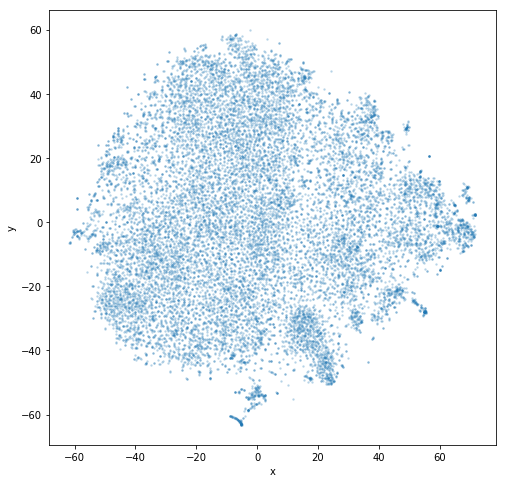

In [32]:
_=coords_df.plot.scatter('x','y', figsize=(8, 8), marker='.', s=10, alpha=0.2)

In [33]:
output_notebook()

Loading BokehJS ...

In [34]:
subset_df = coords_df.sample(n=5000)

In [35]:
p = figure(plot_width=600, plot_height=600)
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.tokens)

In [36]:
show(p)